# Packages

In [14]:
import datetime
from scipy import signal
from StateSpace import *

# Time

In [15]:
start_time,end_time,dt = 0,100,0.001
Time =  np.arange(start_time,end_time,dt)

# Comparison


Here, we show the comparison between the proposed class and scipy class.

of course scipy class is much faster, but the most important point in our class that it allowes single time step solution, which is very helpful when developing some controllers (like for example a reinforcement agent).

## Dc motor

Dc motor system:
took:  0:00:00.298122
took:  0:00:01.001918


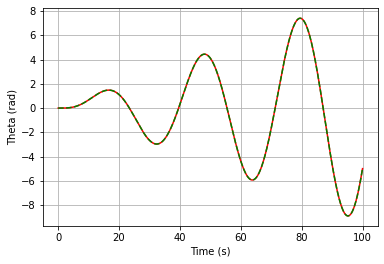

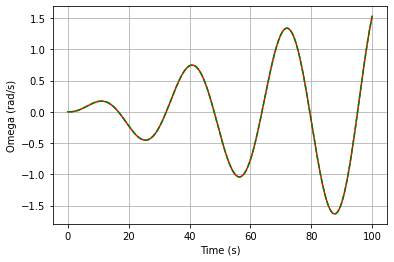

In [13]:
print("Dc motor system:")
#model constants
R,L,K,J,B = 0.5,1.2e-2,0.1,0.5 ,0.5

#inputs
temp = int(len(Time)/4)
#U =  np.concatenate( (5*np.ones((temp,1)) ,10*np.ones((temp,1)) ,np.zeros((temp,1)) ,-30*np.ones((temp,1))) )
U = 0.05*Time*np.sin(0.2*Time)

#state space matrices
A =  np.array([[0,  1,    0],
               [0,-B/J, K/J],
               [0,-K/L,-R/L]])

B = np.array([[0],
              [0],
              [1/L]])

#C = np.eye(3)
C = np.array([[1,0,0],[0,1,0]])

D = np.zeros((2,1))

#building and running the scipy model 
now = datetime.datetime.now()
system = signal.lti(A,B,C,D)
_,Y, _ = signal.lsim2(system, U, Time)
print("took: ", datetime.datetime.now() - now)

#building and running our model
now = datetime.datetime.now()
system2 = StateSpace(A,B,C,D,dt=0.001)
system2.solve(U)
Y2 = system2.get_output()
print("took: ", datetime.datetime.now() - now)

#plotting system outputs
labels =['Theta (rad)','Omega (rad/s)',"Current (A)"]
for y,y2,label in zip(Y.T,Y2.T,labels):
    plt.plot(Time,y,'r')
    plt.plot(Time,y2,'g--')
    plt.xlabel("Time (s)")
    plt.ylabel(label)
    plt.grid(1)
    plt.show()

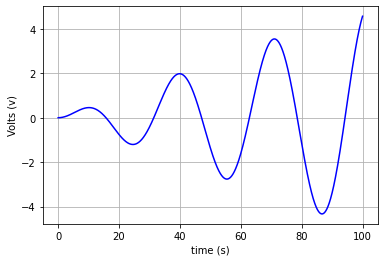

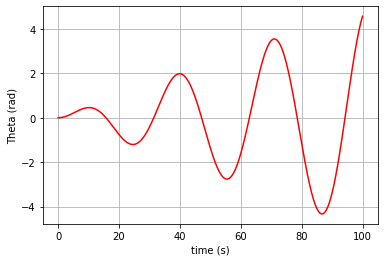

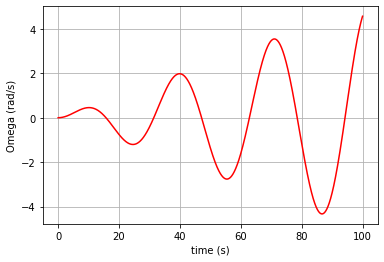

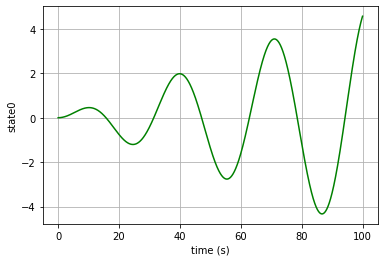

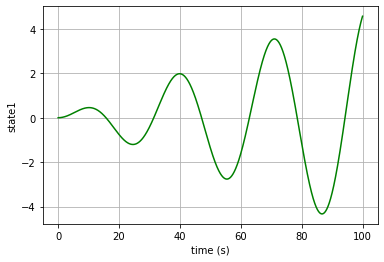

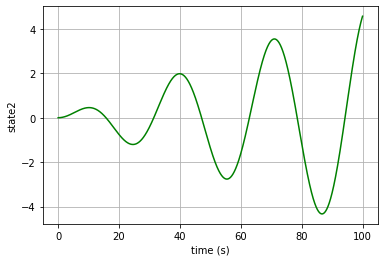

In [40]:
#Test of the plotting function in the class
system2.plot(["Volts (v)"],labels,True)

## Mass spring Damper 

Mass spring damper system:
took:  0:00:00.136944
took:  0:00:00.763045


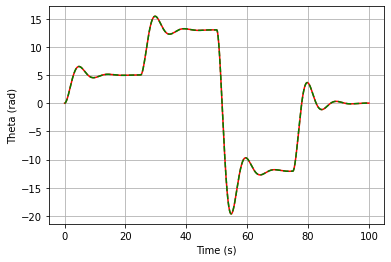

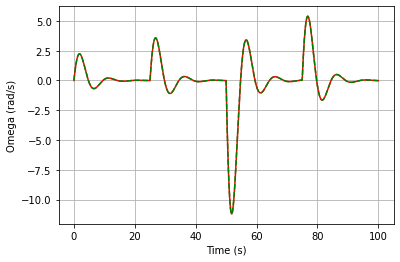

In [42]:
print("Mass spring damper system:")
#parameters
k,b,m=1,1,2

#inputs
temp = int(len(Time)/4)
U =  np.concatenate( (5*np.ones((temp,)),13*np.ones((temp,)),-12*np.ones((temp,)) ,np.zeros((temp,))) )


#state space matrices
A = np.array([[0,1],[-k/m,-b/m]])
B = np.array([[0],[1/m]])
C = np.eye(2)


#building and running the scipy model 
now = datetime.datetime.now()
system = signal.lti(A,B,C,D)
_,Y, _ = signal.lsim2(system, U, Time)
print("took: ", datetime.datetime.now() - now)

#building and running our model
now = datetime.datetime.now()
system2 = StateSpace(A,B,C,D,dt=0.001)
system2.solve(U)
Y2 = system2.get_output()
print("took: ", datetime.datetime.now() - now)

#plotting system outputs
labels =['Theta (rad)','Omega (rad/s)',"Current (A)"]
for y,y2,label in zip(Y.T,Y2.T,labels):
    plt.plot(Time,y,'r')
    plt.plot(Time,y2,'g--')
    plt.xlabel("Time (s)")
    plt.ylabel(label)
    plt.grid(1)
    plt.show()